In [2]:
import pandas as pd
from fbprophet import Prophet

In [4]:
df = pd.read_csv('./data/housing_in_london_monthly_variables.csv')
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [7]:
city_of_london = df.loc[df['area'] == 'city of london']
city_of_london.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [82]:
ds_y = city_of_london[["date", "average_price"]]
ds_y.columns = ['ds', 'y']
ds_y.dropna()
ds_y = ds_y.sort_values(by=['ds'], inplace=False, ascending=True)
ds_y.tail(n=10)

,ds,y
291,2019-04-01,738842
292,2019-05-01,718773
293,2019-06-01,743157
294,2019-07-01,719871
295,2019-08-01,777613
296,2019-09-01,792034
297,2019-10-01,827093
298,2019-11-01,777610
299,2019-12-01,734872
300,2020-01-01,775309


In [68]:
m = Prophet()
m.fit(ds_y)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
help(m.make_future_dataframe)

Help on method make_future_dataframe in module fbprophet.forecaster:

make_future_dataframe(periods, freq='D', include_history=True) method of fbprophet.forecaster.Prophet instance
    Simulate the trend using the extrapolated generative model.
    
    Parameters
    ----------
    periods: Int number of periods to forecast forward.
    freq: Any valid frequency for pd.date_range, such as 'D' or 'M'.
    include_history: Boolean to include the historical dates in the data
        frame for predictions.
    
    Returns
    -------
    pd.Dataframe that extends forward from the end of self.history for the
    requested number of periods.



In [77]:
future = m.make_future_dataframe(periods=30, freq='M')
future.tail()

,ds
326,2022-02-28
327,2022-03-31
328,2022-04-30
329,2022-05-31
330,2022-06-30


In [78]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
326,2022-02-28,909036.804543,858403.169752,983101.326930,901533.821289,918190.077900,9618.631079,9618.631079,9618.631079,9618.631079,9618.631079,9618.631079,0.0,0.0,0.0,918655.435622
327,2022-03-31,911293.472186,849251.147541,968315.510223,903195.018936,921097.372781,-4370.574279,-4370.574279,-4370.574279,-4370.574279,-4370.574279,-4370.574279,0.0,0.0,0.0,906922.897907
328,2022-04-30,913477.344099,841286.416051,967955.929878,904959.524438,923821.242745,-9272.418197,-9272.418197,-9272.418197,-9272.418197,-9272.418197,-9272.418197,0.0,0.0,0.0,904204.925902
329,2022-05-31,915734.011742,852290.657209,971083.174607,906788.563999,926763.124890,-5791.064211,-5791.064211,-5791.064211,-5791.064211,-5791.064211,-5791.064211,0.0,0.0,0.0,909942.947531
330,2022-06-30,917917.883654,850239.432315,969592.565899,908503.037716,929519.877355,-7948.860383,-7948.860383,-7948.860383,-7948.860383,-7948.860383,-7948.860383,0.0,0.0,0.0,909969.023272


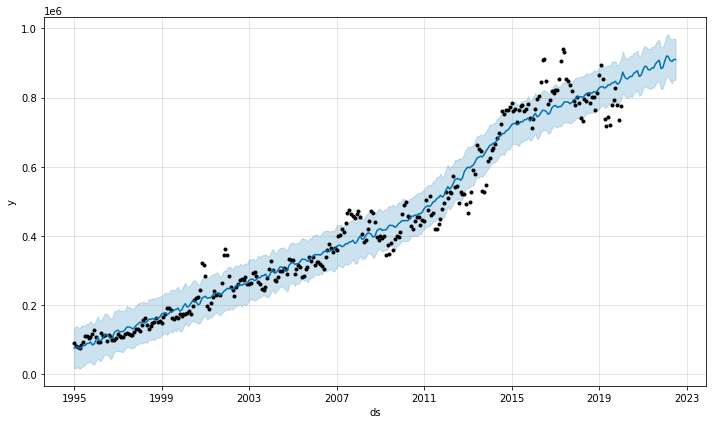

In [80]:
figure = m.plot(forecast)

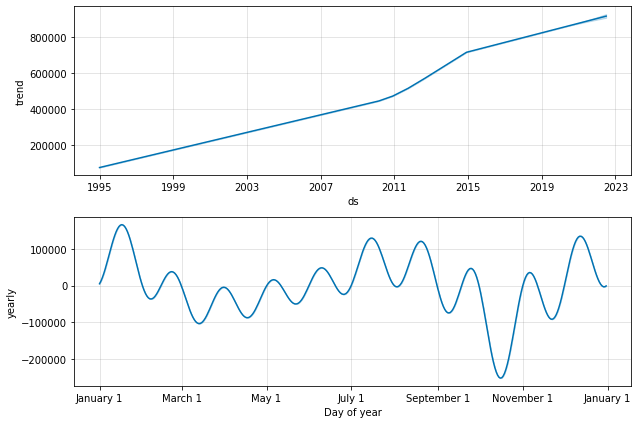

In [81]:
figure2 = m.plot_components(forecast)